# Crypto jacking detection

This exercise is my solution to the "2023 Umoja Hack Africa". Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources. The objective of this challenge is to classify network activity from various websites as either cryptojacking or not, based on features related to both network-based and host-based data. Being a purely numerical data set, alot of feature engineering would be carried out. Check the readme file for the variable defination.

Lets start by importing necessary libraries and reading in the data


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [144]:
df = pd.read_csv('Train (1).csv')

In [145]:
df

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,26.769658,6965.281426,25.0,0.155955,1.497184,0.000000,252.525113,589.072219,0.858386,0.758573,0.019962,0.0,1177.825039,30.875026,1
8904,ID_YIC5VRPLUD,0.000000,0.000000,27.0,0.000000,0.400009,0.000000,28.089513,27.267273,0.400009,0.355563,0.000000,0.0,221.249363,23.503856,0
8905,ID_T3RF72SEG1,0.866827,853.957842,29.0,0.000000,4.378587,0.000000,20.559356,26.093712,0.333395,0.355621,0.022226,0.0,262.270699,21.060478,0
8906,ID_2AUQFJYWKV,0.044430,16.527885,28.0,0.000000,0.888596,0.000000,74.375484,116.650437,0.555372,0.377653,0.000000,0.0,268.222697,24.775056,0


Seeing that all the data is numerical and there are no null values, most of our work would be focused on feaure engineering

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

<AxesSubplot:xlabel='Label', ylabel='count'>

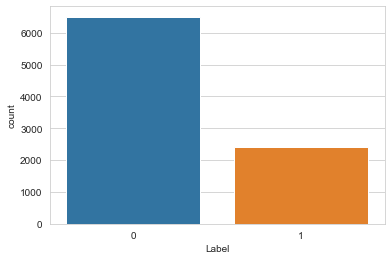

In [155]:
sns.countplot(x='Label',data=df)

In [148]:
variables = pd.read_csv('Variable_Definitions.csv')

In [149]:
variables

,Feature,Description
0,I/O Data Operations,Speed at which the process is issuing read and...
1,I/O Data Bytes,Speed at which the process is reading and writ...
2,Number of subprocesses,Number of sub-processes that are currently act...
3,Time on processor,"The total time, in seconds, that a process has..."
4,Disk Reading/sec,Speed of disk reading operations
5,Disc Writing/sec,Speed of writing operations to disk
6,Confirmed byte radius,The ratio of Memory/Bytes committed and Memory...
7,Pages Read/sec,Speed rate at which the disk was read in order...
8,Pages Input/sec,Speed at which pages are written to disk to fr...
9,Page Errors/sec,This is the average number of pages with fault...


Lets check for highly correlated features, it is advised to drop highly correlated features

<AxesSubplot:>

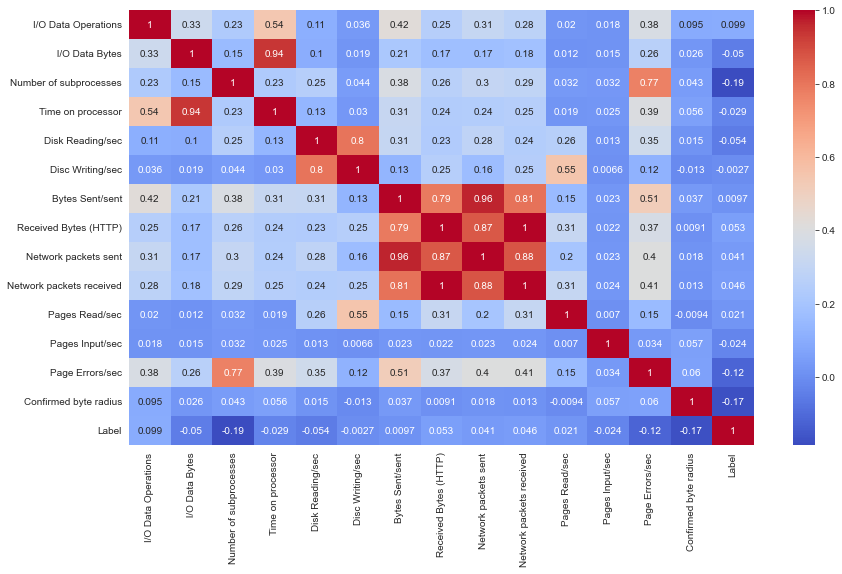

In [156]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [157]:
df.drop(['Network packets sent','Network packets received','Disc Writing/sec','Time on processor'],axis = 1,inplace = True)

<AxesSubplot:>

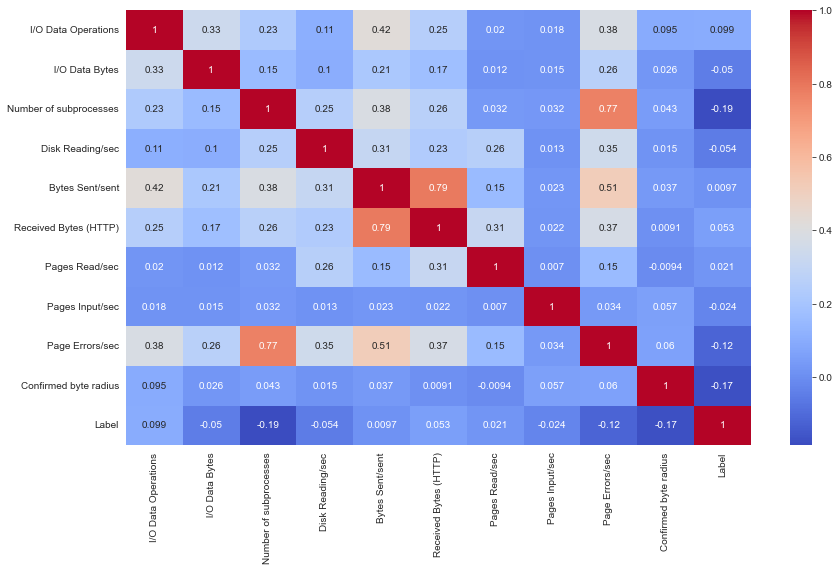

In [158]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Lets plot a histogram of each feature to check its distibution

In [159]:
df.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Disk Reading/sec', 'Bytes Sent/sent',
       'Received Bytes (HTTP)', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius', 'Label'],
      dtype='object')

In [153]:
columns = ['I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Disk Reading/sec', 'Bytes Sent/sent',
       'Received Bytes (HTTP)', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius']    

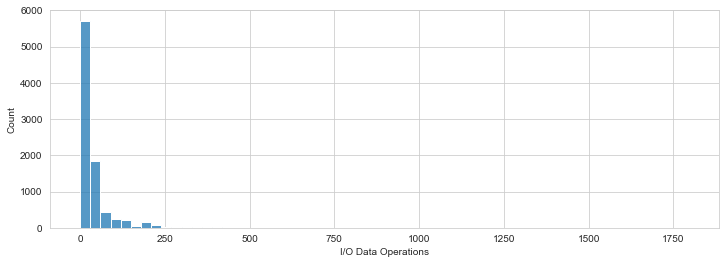

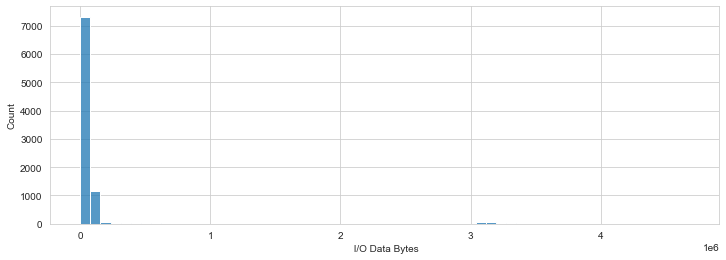

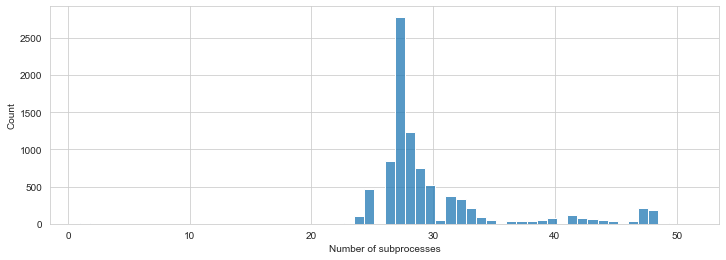

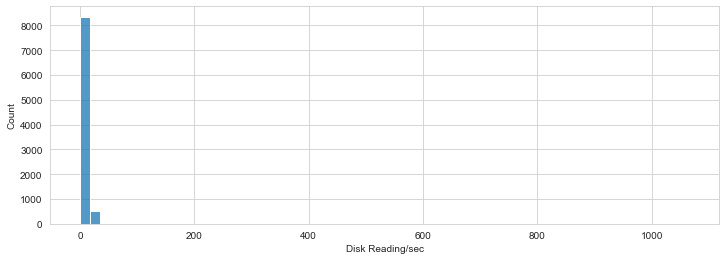

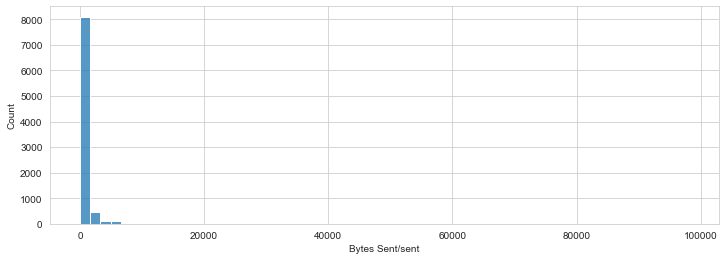

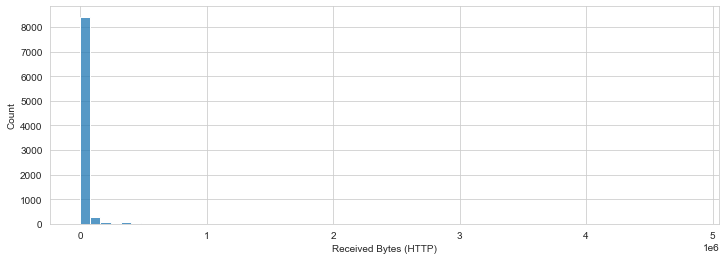

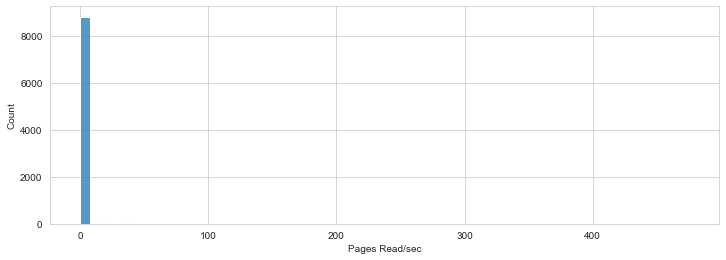

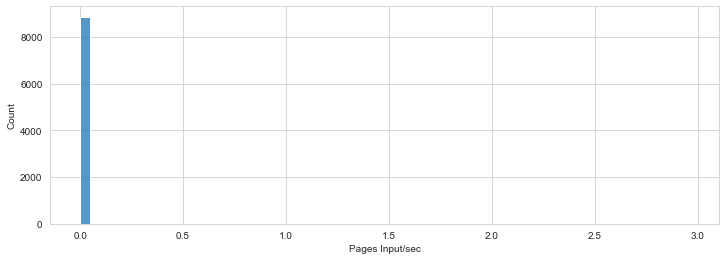

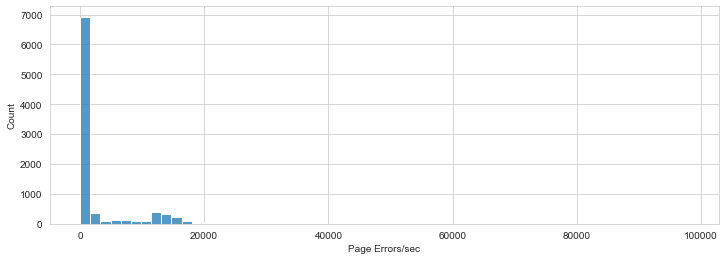

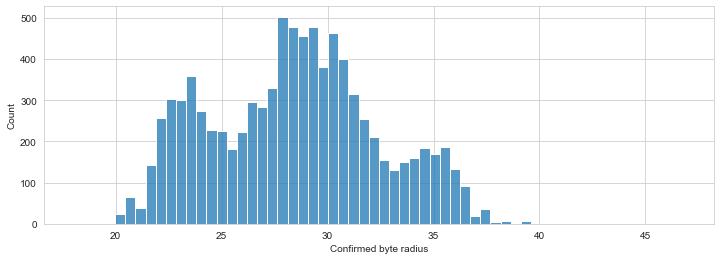

In [160]:
for item in columns:
    fig,ax = plt.subplots(nrows = 1, ncols=1, figsize=(12,4))
    sns.histplot(data = df, x = df[item],bins = 60)


From the charts above, one can clearly see there are massive outliers in the data, lets check out one

In [161]:
df.sort_values('I/O Data Operations',ascending = False).head(50)


,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Disk Reading/sec,Bytes Sent/sent,Received Bytes (HTTP),Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
1968,ID_E2PDAB714I,1795.316255,3.951748e+06,44.0,35.340267,19144.186550,353321.663400,1.205778,0.0,56769.885790,46.658146,0
7450,ID_RBYXUVPMHN,1469.029821,3.425338e+06,37.0,14.193525,4364.369344,85956.743930,1.176149,0.0,17568.593540,25.003165,1
4836,ID_VLCM0LR4DA,1273.049850,1.419480e+06,47.0,25.205404,13842.347800,388670.337600,2.772201,0.0,17337.523370,26.233618,1
7111,ID_AAPDZ89GVA,1231.030581,5.410029e+05,32.0,17.813607,7524.098184,625029.062500,0.112602,0.0,98031.408630,46.784800,0
5065,ID_5I1N2HV8KX,1210.516465,7.777145e+05,40.0,16.366143,7502.164561,196026.928800,0.311313,0.0,77864.973970,37.961090,0
5233,ID_I1T5GO6I75,1024.316376,3.163940e+05,48.0,27.779729,11251.390120,59354.968170,1.311203,0.0,36580.746640,29.075723,0
3171,ID_B7NFYT4PF4,980.365127,9.576333e+05,36.0,18.858729,25403.040800,383438.116000,0.466470,0.0,12899.015050,32.891509,0
2869,ID_F0U0M3STY2,948.272916,6.342414e+05,38.0,12.087552,2589.580305,15499.397150,1.155428,0.0,7802.426079,29.122368,1
7112,ID_A0531HQHCN,898.480865,3.614277e+06,37.0,20.283663,10660.425990,369265.404100,0.516528,0.0,16211.216370,33.386247,1
7714,ID_WMQ46I4Y05,887.481683,9.370358e+05,38.0,29.765003,26124.002750,386244.814600,1.200381,0.0,23024.218900,31.166359,0


You can see from the feature selected above, that the initial figures are extremely high, then drop rapidly to around 400. One of my ways of dealing with outliers is to replace the outlier figures with the 99th percentile. I did this to every feature with outliers.

In [162]:
df['I/O Data Operations'] = df['I/O Data Operations'].apply(lambda x:x if x < np.percentile(df['I/O Data Operations'],99) else np.percentile(df['I/O Data Operations'],99))

In [163]:
df[' I/O Data Bytes'] = df[' I/O Data Bytes'].apply(lambda x:x if x < np.percentile(df[' I/O Data Bytes'],99) else np.percentile(df[' I/O Data Bytes'],99))

In [164]:
df['Disk Reading/sec'] = df['Disk Reading/sec'].apply(lambda x:x if x < np.percentile(df['Disk Reading/sec'],99) else np.percentile(df['Disk Reading/sec'],99))

In [165]:
df['Bytes Sent/sent'] = df['Bytes Sent/sent'].apply(lambda x:x if x < np.percentile(df['Bytes Sent/sent'],99) else np.percentile(df['Bytes Sent/sent'],99))

In [166]:
df['Received Bytes (HTTP)'] = df['Received Bytes (HTTP)'].apply(lambda x:x if x < np.percentile(df['Received Bytes (HTTP)'],99) else np.percentile(df['Received Bytes (HTTP)'],99))

In [167]:
df['Pages Read/sec'] = df['Pages Read/sec'].apply(lambda x:x if x < np.percentile(df['Pages Read/sec'],99) else np.percentile(df['Pages Read/sec'],99))

In [168]:
df['Pages Input/sec'] = df['Pages Input/sec'].apply(lambda x:x if x < np.percentile(df['Pages Input/sec'],99) else np.percentile(df['Pages Input/sec'],99))

In [169]:
df['Page Errors/sec'] = df['Page Errors/sec'].apply(lambda x:x if x < np.percentile(df['Page Errors/sec'],99) else np.percentile(df['Page Errors/sec'],99))

In the case of 'Number of subprocesses', the outliers are not extremely high values, but low values, i will replace those low values with 20

In [170]:
df.sort_values('Number of subprocesses',ascending = True).head(50)

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Disk Reading/sec,Bytes Sent/sent,Received Bytes (HTTP),Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
4019,ID_MWGZ8MGT84,31.369916,127228.251100,1.0,2.688397,186.721362,270.794854,0.288836,0.0,788.122339,28.862461,0
1785,ID_QWCBX4AZZQ,76.674420,17529.336620,1.0,0.377707,147.727679,140.662346,0.155526,0.0,955.930725,21.942849,0
403,ID_GG5940901Q,32.709430,121124.141400,1.0,2.355271,124.784912,667.119335,0.799903,0.0,689.738822,27.409137,0
551,ID_9DHR0V1UFX,32.709430,121124.141400,1.0,3.174891,111.654041,132.723773,0.288626,0.0,736.508153,20.558193,0
5207,ID_EEIQYBB8DE,32.709430,121124.141400,1.0,2.066731,112.981312,134.270866,0.155560,0.0,451.903023,27.958644,0
3178,ID_88JY41PNV6,31.369916,127228.251100,1.0,13.399452,103.506880,123.172743,0.311098,0.0,877.208590,26.222565,0
7987,ID_TCTG0DIGS9,31.369916,127228.251100,1.0,3.174891,111.654041,132.723773,0.288626,0.0,736.508153,20.558193,0
2116,ID_4XCY0JK9US,31.369916,127228.251100,1.0,2.355271,124.784912,667.119335,0.799903,0.0,689.738822,27.409137,0
6621,ID_A1OF2JDRO0,3.042165,689.128046,1.0,2.575848,59.844045,27.357278,0.044411,0.0,315.829999,25.875267,0
3821,ID_WFJCR7LANO,31.369916,127228.251100,1.0,2.066731,112.981312,134.270866,0.155560,0.0,451.903023,27.958644,0


In [171]:
df['Number of subprocesses'] = df['Number of subprocesses'].apply(lambda x:x if x > 22 else 20)

Now we are done with that, let us look at the distribution now

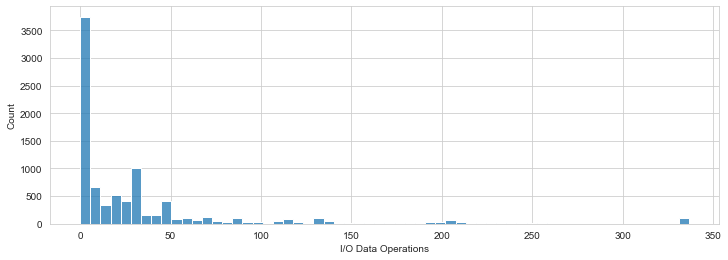

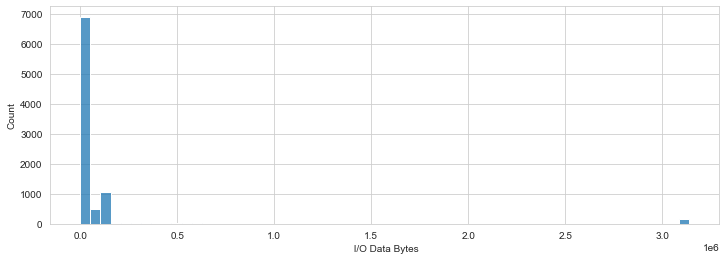

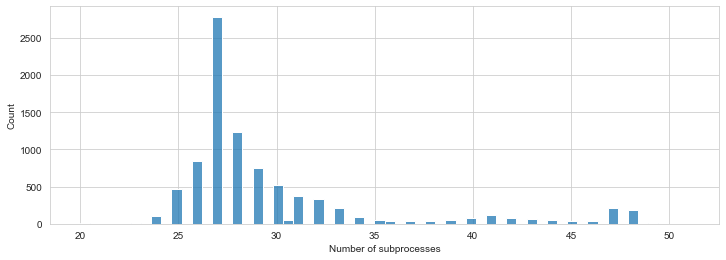

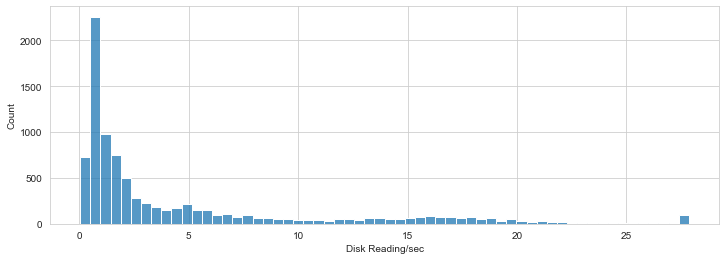

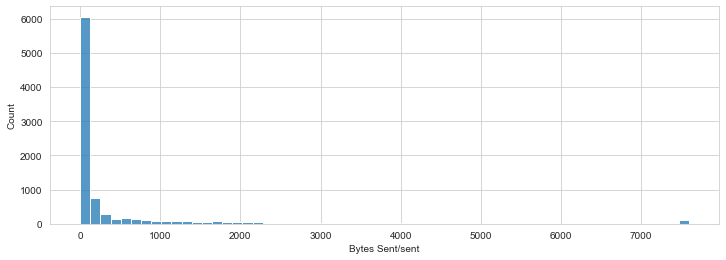

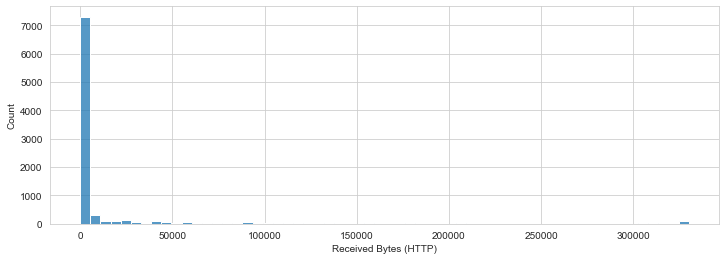

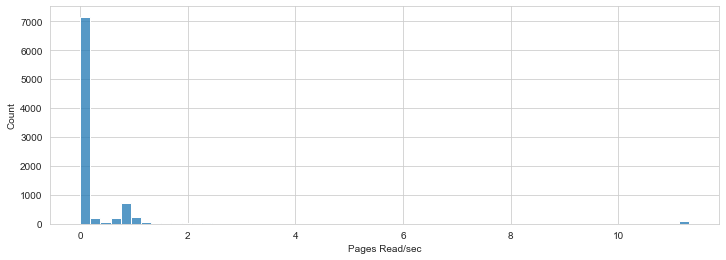

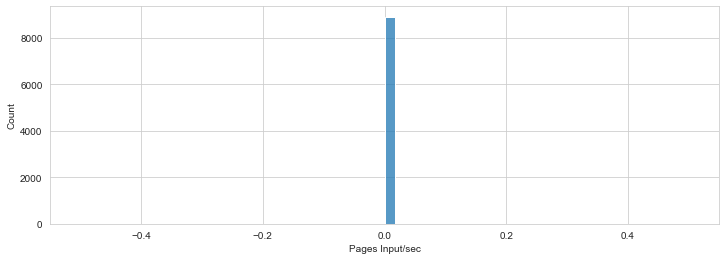

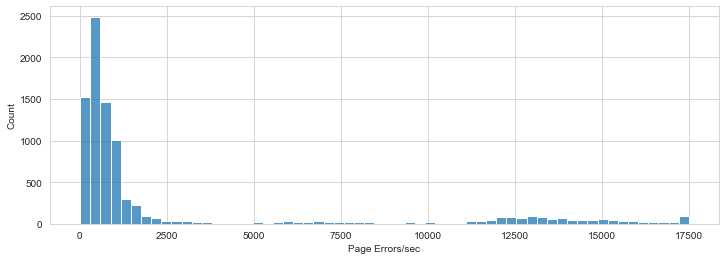

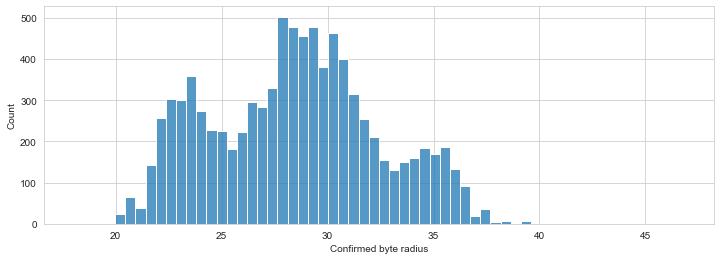

In [172]:
for item in columns:
    fig,ax = plt.subplots(nrows = 1, ncols=1, figsize=(12,4))
    sns.histplot(data = df, x = df[item],bins = 60)


Looking at the charts above, the 'Pages Input/sec' has just one bar on the 0 point. Lets explore this

In [173]:
df['Pages Input/sec'].unique()

array([0.])

As suspected, all the values in that feature is 0, this makes the feature irrelevant and we can remove it

In [174]:
df.drop('Pages Input/sec',axis = 1, inplace = True)

For the remaining features, the distibution is skewed to one side. A Gausian distribution is more favourable to most models. One of my favorite ways of achieving a gausian distribution is by performing a power transform on each feature. This might be time consuming, looking for which power perfectly transforms the feature to a gausian distribution, but it is highly effective.

C:\Users\EBUKA ONUOHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='I/O Data Operations'>

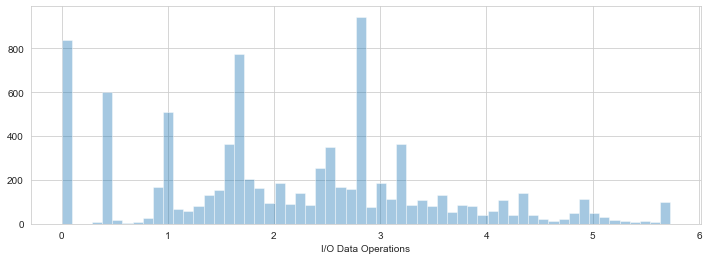

In [175]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.distplot(df['I/O Data Operations']**0.3,kde=False,bins=60)


In [176]:
df['I/O Data Operations'] = df['I/O Data Operations']**0.3

<AxesSubplot:xlabel=' I/O Data Bytes'>

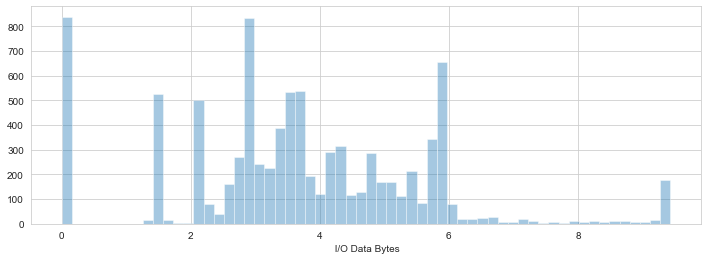

In [177]:
plt.figure(figsize=(12,4))
sns.distplot(df[' I/O Data Bytes']**0.15,kde=False,bins=60)


In [178]:
df[' I/O Data Bytes'] = df[' I/O Data Bytes']**0.15

<AxesSubplot:xlabel='Number of subprocesses'>

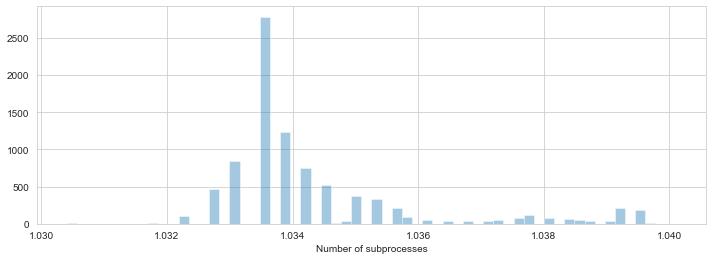

In [179]:
plt.figure(figsize=(12,4))
sns.distplot(df['Number of subprocesses']**0.01,kde=False,bins=60)


In [180]:
df['Number of subprocesses'] = df['Number of subprocesses']**0.01

<AxesSubplot:xlabel='Disk Reading/sec'>

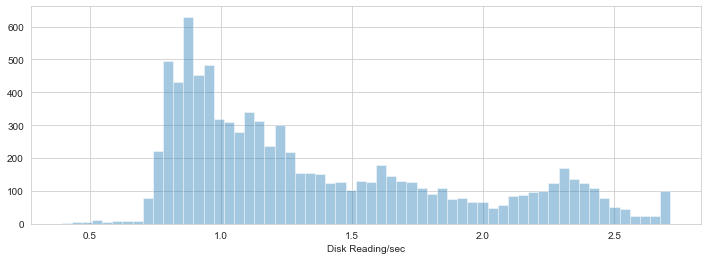

In [181]:
plt.figure(figsize=(12,4))
sns.distplot(df['Disk Reading/sec']**0.3,kde=False,bins=60)


In [182]:
df['Disk Reading/sec'] = df['Disk Reading/sec']**0.3

<AxesSubplot:xlabel='Bytes Sent/sent'>

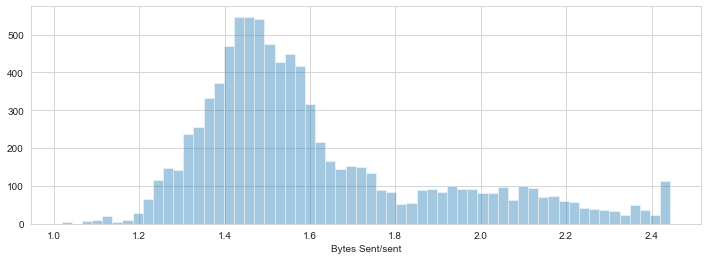

In [183]:
plt.figure(figsize=(12,4))
sns.distplot(df['Bytes Sent/sent']**0.1,kde=False,bins=60)


In [184]:
df['Bytes Sent/sent'] = df['Bytes Sent/sent']**0.1

<AxesSubplot:xlabel='Received Bytes (HTTP)'>

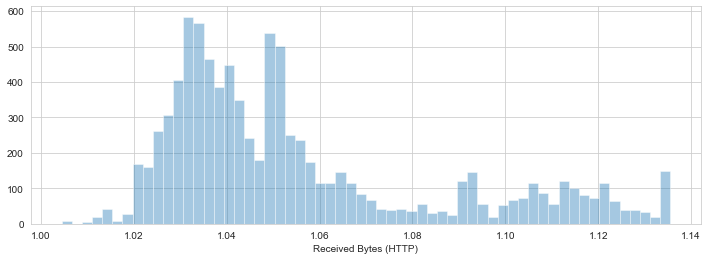

In [185]:
plt.figure(figsize=(12,4))
sns.distplot(df['Received Bytes (HTTP)']**0.01,kde=False,bins=60)


In [186]:
df['Received Bytes (HTTP)'] = df['Received Bytes (HTTP)']**0.01

<AxesSubplot:xlabel='Pages Read/sec'>

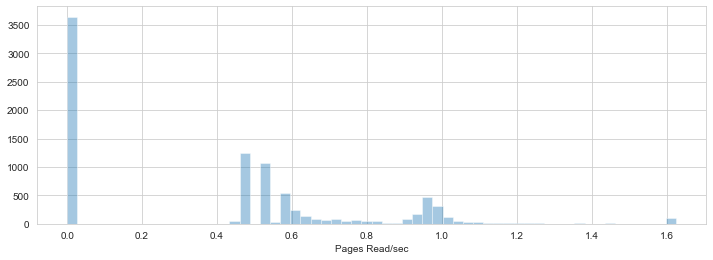

In [187]:
plt.figure(figsize=(12,4))
sns.distplot(df['Pages Read/sec']**0.2,kde=False,bins=60)


In [188]:
df['Pages Read/sec'] = df['Pages Read/sec']**0.2

<AxesSubplot:xlabel='Page Errors/sec'>

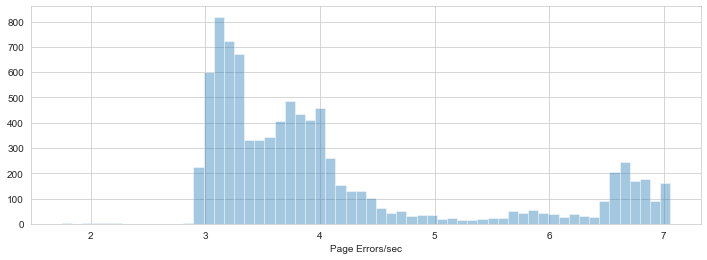

In [189]:
plt.figure(figsize=(12,4))
sns.distplot(df['Page Errors/sec']**0.2,kde=False,bins=60)


In [190]:
df['Page Errors/sec'] = df['Page Errors/sec']**0.2


<AxesSubplot:xlabel='Confirmed byte radius'>

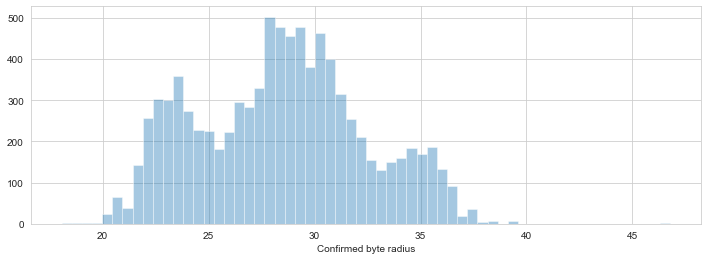

In [191]:
plt.figure(figsize=(12,4))
sns.distplot(df['Confirmed byte radius'],kde=False,bins=60)


In [193]:
df

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Disk Reading/sec,Bytes Sent/sent,Received Bytes (HTTP),Pages Read/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,4.149362,3.441943,1.033883,1.725537,1.502139,1.042459,1.624356,3.982292,27.190843,1
1,ID_UD3TM0ZYND,2.214450,3.607284,1.033883,1.658464,1.367598,1.034426,0.536482,4.049629,30.150941,0
2,ID_XAG1HC0HWM,0.392956,2.052681,1.033883,1.146602,1.279210,1.025893,0.536491,3.174653,28.163287,0
3,ID_CEXD05IR09,2.811603,5.830255,1.034936,2.296583,1.896569,1.092538,1.412537,6.545548,34.204404,0
4,ID_X6E97FT8IF,1.625133,2.855688,1.032712,1.095671,1.320649,1.026193,0.000000,3.533692,31.466889,1
...,...,...,...,...,...,...,...,...,...,...,...
8903,ID_XJWM9B7X4L,2.680976,3.770863,1.032712,1.128711,1.738723,1.065864,0.457133,4.113544,30.875026,1
8904,ID_YIC5VRPLUD,0.000000,0.000000,1.033508,0.759663,1.395900,1.033609,0.000000,2.944262,23.503856,0
8905,ID_T3RF72SEG1,0.958031,2.752425,1.034246,1.557400,1.353010,1.033155,0.467061,3.046141,21.060478,0
8906,ID_2AUQFJYWKV,0.392918,1.523115,1.033883,0.965187,1.538661,1.048742,0.000000,3.059843,24.775056,0


Now we are done with the transformations, lets look again for highly correlated features and remove the highly correlated ones

<AxesSubplot:>

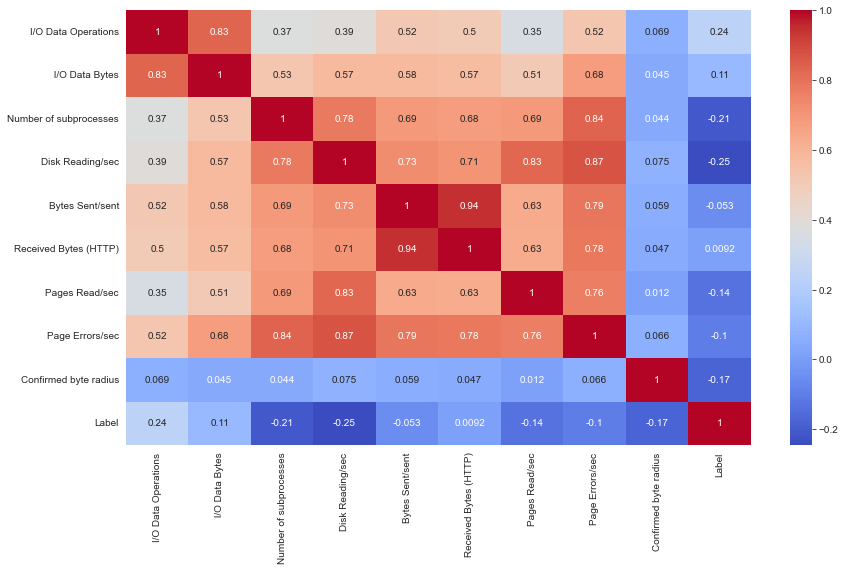

In [194]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [195]:
df.drop('Bytes Sent/sent',axis=1,inplace = True)

We can remove the ID column since we cant extract any useful information from it

In [196]:
df.drop('ID',axis=1,inplace=True)

In [197]:
X = df.drop('Label', axis = 1)

In [199]:
y = df['Label']

Lets split our data to train and test sets

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

We should scale our data to make it easier for our model to train on

In [203]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
scaler = MinMaxScaler()

In [205]:
X_train= scaler.fit_transform(X_train)

In [206]:
X_test = scaler.transform(X_test)

Using a Random Forest Classifier

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
rfc = RandomForestClassifier(n_estimators=100)

In [210]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [211]:
rfc_pred = rfc.predict(X_test)

In [213]:
from sklearn.metrics import classification_report,confusion_matrix

In [214]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1967
           1       0.96      0.88      0.92       706

    accuracy                           0.96      2673
   macro avg       0.96      0.93      0.95      2673
weighted avg       0.96      0.96      0.96      2673



In [216]:
print(confusion_matrix(y_test,rfc_pred))

[[1943   24]
 [  85  621]]


With an accuracy of 96% and an average f1 score of 95%, this model performed exellently well. However, there was someone with an f1 score of 100%, meaning more can still be done on the dataset. As usual im open to questions and suggestions.